# Import the necessary libraries / packages as required



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Instantiate the required constants

In [ ]:
FILE_NAME = '/content/sample_data/diabetes_012_health_indicators_BRFSS2015 (2).csv'

# Read/load in the data as a Pandas dataframe

In [ ]:
def read_file(file_name,header=True):
  if header:
    df = pd.read_csv(file_name)
  else:
    df = pd.read_csv(file_name,header=None)
  return df

df = read_file(FILE_NAME)

# Identify the dimensions of the dataframe and indicate if the variables have suitable types

In [ ]:
dim = df.shape
print("There are {} rows and {} columns present in the source dataset".format(dim[0],dim[1]))

There are 253680 rows and 22 columns present in the source dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

All of the columns present in the dataset are of float data types. However, we need to cast some of the columns in the context of model development.

# Identify if there are any missing values

In [ ]:
column_missing_values = df.isnull().sum()
print(column_missing_values)
print(" ")
row_missing_values = df.isnull().sum(axis=1).sort_values(ascending=True)
print(row_missing_values)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
 
0         0
169112    0
169113    0
169114    0
169115    0
         ..
84565     0
84566     0
84567     0
84569     0
253679    0
Length: 253680, dtype: int64


Since we don't have any missing values present, we need not perform imputation.

# Identify if there is any invalid data

In [ ]:
columns_list = df.columns
for column in columns_list:
  print(df[column].value_counts(dropna=False))

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64
0.0    144851
1.0    108829
Name: HighBP, dtype: int64
0.0    146089
1.0    107591
Name: HighChol, dtype: int64
1.0    244210
0.0      9470
Name: CholCheck, dtype: int64
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
0.0    141257
1.0    112423
Name: Smoker, dtype: int64
0.0    243388
1.0     10292
Name: Stroke, dtype: int64
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64
1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64
1.0    160898
0.0     92782
Name: Fruits, dtype: int64
1.0    205841
0.0     47839
Name: Veggies, dtype: int64
0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dtype: int64
1.0    241263
0.0     12417
Name: AnyHealthcare, dtype: int64
0.0    232326
1.0     21354
Name: NoDocbcCost, dtype: int64
2.0    89084
3.0    75646


Since all of the columns have the data present in the pre-defined range as mentioned in the source dataset description, there doesn't seem to be any invalid data present.

# Filter any columns with only missing values

Since there are no missing values present, this step is not required in the context of the source dataset

# Impute/delete the missing values as applicable

Since there are no missing values present, this step is not required in the context of the source dataset

# Change column data types as necessary

In [ ]:
def casting_column_data_types(df, columns_list,required_column_data_type):
  for column_name in columns_list:
     df[column_name] = df[column_name].astype(required_column_data_type)
casting_column_data_types(df,df.columns,"int")
df.dtypes

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

# Handle invalid data as necessary

Since we don't have invalid data present, this step is not required as per our dataset

# Transform features into desired outputs as necessary

Since all the numerical and categorical columns present in the dataset are of integer data type, we need not transform again.

# Perform summary statistics of each feature, remove outliers as necessary

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


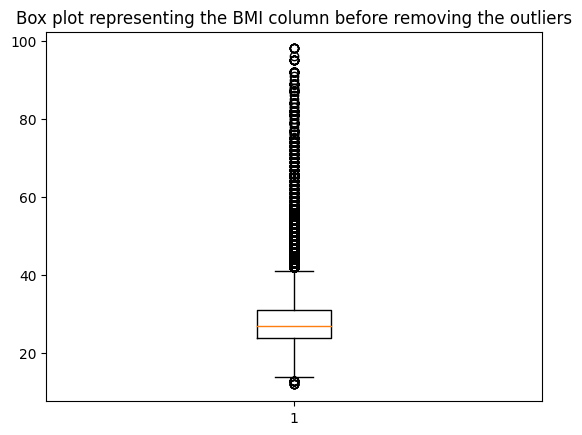

In [ ]:
plt.boxplot(df['BMI'])
plt.title("Box plot representing the BMI column before removing the outliers")
plt.show()

The feature BMI is the only column which has some unexpected values present. So we need to remove outliers for this column. Since, rest of the numerical / categorical columns have values with in the min-max range, we need not remove outliers for the rest of the columns

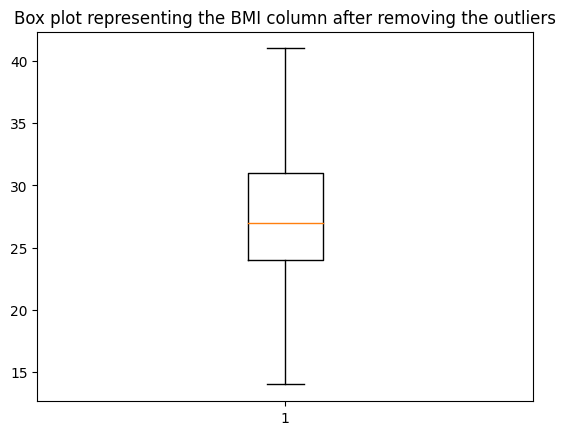

In [ ]:
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)

IQR = q3 - q1

df_with_no_outliers = df[(df['BMI'] >= q1 - 1.5 * IQR) & (df['BMI'] <= q3 + 1.5 * IQR)]

plt.boxplot(df_with_no_outliers['BMI'])
plt.title("Box plot representing the BMI column after removing the outliers")
plt.show()


In [ ]:
df_with_no_outliers.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,...,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000
mean,0.280102,0.420140,0.422027,0.962187,27.569492,0.443398,0.040122,0.093039,0.764585,0.637896,...,0.951774,0.081580,2.480964,3.070413,4.063667,0.156931,0.445001,8.062932,5.060558,6.090767
std,0.681138,0.493582,0.493884,0.190744,4.964920,0.496787,0.196245,0.290488,0.424259,0.480610,...,0.214243,0.273725,1.059246,7.272803,8.541691,0.363737,0.496967,3.064311,0.983537,2.054222
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Now, the values present in the BMI column are by far nearer when compared to the values present before removing outliers

# Drop duplicate rows as necessary

In [ ]:
actual_size = df_with_no_outliers.shape
print("There are {} rows and {} columns after removing outliers and before dropping duplicates".format(actual_size[0],actual_size[1]))
df_with_no_outliers.drop_duplicates(inplace=True)
size_after_removing_dulicates = df_with_no_outliers.shape
print("There are {} rows and {} columns after removing outliers and before dropping duplicates".format(size_after_removing_dulicates[0],size_after_removing_dulicates[1]))



There are 243833 rows and 22 columns after removing outliers and before dropping duplicates
There are 219937 rows and 22 columns after removing outliers and before dropping duplicates


<ipython-input-35-b3562644f50f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_no_outliers.drop_duplicates(inplace=True)


# Shuffle the data

In [ ]:
df_with_no_outliers.sample(frac=1)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
13506,0,0,0,1,21,0,0,0,1,1,...,1,0,2,0,2,0,0,2,6,7
192989,0,0,0,1,30,0,0,0,0,1,...,1,0,1,0,0,0,0,7,4,4
97423,0,1,0,1,33,0,0,0,1,1,...,1,0,3,0,0,0,1,12,6,8
182830,0,1,0,1,23,0,0,0,1,1,...,1,0,1,0,3,0,0,7,6,8
227693,0,0,0,1,23,1,0,0,1,1,...,1,0,1,0,0,0,1,5,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22386,0,0,0,1,28,0,0,0,1,0,...,1,0,2,0,0,0,0,8,5,8
61210,0,0,0,0,21,1,0,0,1,1,...,1,0,1,4,0,0,0,12,6,4
108000,0,1,1,1,18,1,0,0,1,0,...,1,0,4,10,6,0,0,8,4,1
13129,2,1,1,1,39,1,0,1,1,1,...,1,0,1,0,30,1,1,10,6,2


# Plot a heat map/correlation matrix (pairplot) to identify any confounded explanatory variables

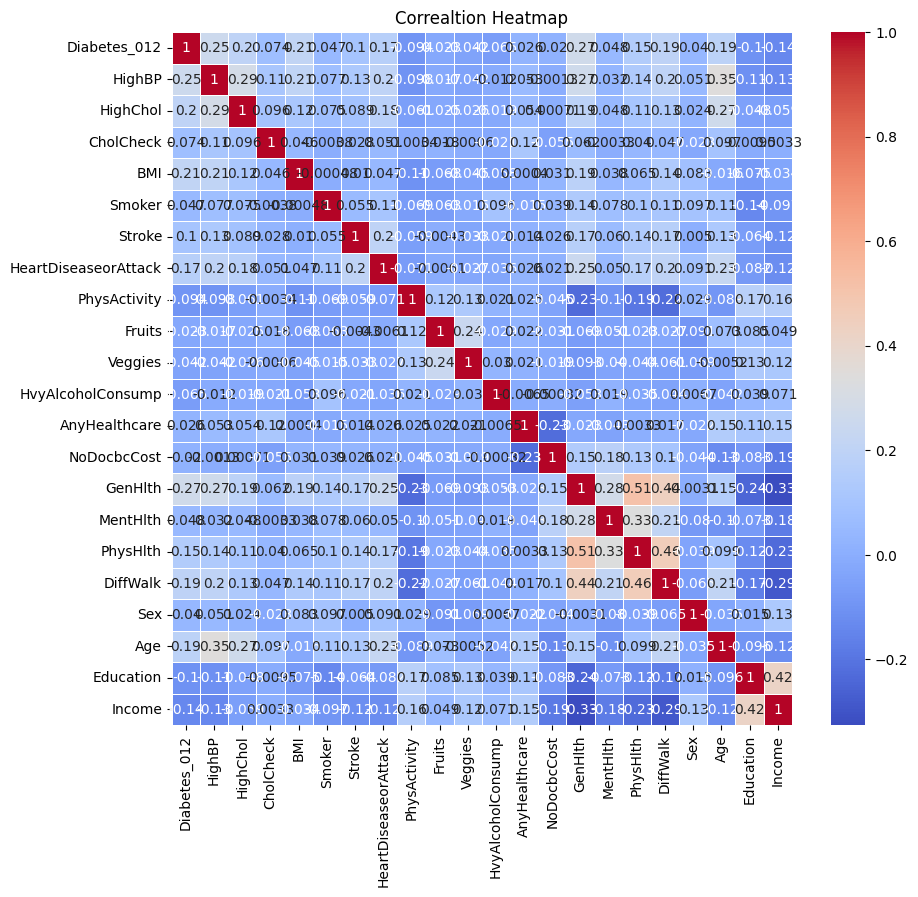

In [ ]:
corr_matrix = df_with_no_outliers.corr()
plt.figure(figsize=(10,9))
sns.heatmap(corr_matrix, annot=True,cmap="coolwarm", linewidth=0.5)
plt.title("Correaltion Heatmap")
plt.show()

Since no two variables are highly correlated, we will be including all the variables for the model development. The highest correaltion coefficient between two independent variables seems to be around 0.51 which indicated all of the variables are weekly correlated!

# Drop confounded/unimportant features as necessary

Since all of the variables are weekly correlated, we will not drop the feautres as per the input dataset taken

#Standardize the features inorder to be comparable with the other columns that are of integer type

In [ ]:
scaler = StandardScaler()
df_with_no_outliers['Age_standardized'] = scaler.fit_transform(df_with_no_outliers[['Age']])
df_with_no_outliers['BMI_standardized'] = scaler.fit_transform(df_with_no_outliers[['BMI']])
df_with_no_outliers['GenHlth_standardized'] = scaler.fit_transform(df_with_no_outliers[['GenHlth']])
df_with_no_outliers['MentHlth_standardized'] = scaler.fit_transform(df_with_no_outliers[['MentHlth']])
df_with_no_outliers['PhysHlth_standardized'] = scaler.fit_transform(df_with_no_outliers[['PhysHlth']])
df_with_no_outliers['Education_standardized'] = scaler.fit_transform(df_with_no_outliers[['Education']])
df_with_no_outliers['Income_standardized'] = scaler.fit_transform(df_with_no_outliers[['Income']])
print(df_with_no_outliers)

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                  0       1         1          1   40       1       0   
1                  0       0         0          0   25       1       0   
2                  0       1         1          1   28       0       0   
3                  0       1         0          1   27       0       0   
4                  0       1         1          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253674             0       0         0          1   27       0       0   
253676             2       1         1          1   18       0       0   
253677             0       0         0          1   28       0       0   
253678             0       1         0          1   23       0       0   
253679             2       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  Age  Education  \
0                          0        

<ipython-input-40-ac59f278ed99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_no_outliers['Age_standardized'] = scaler.fit_transform(df_with_no_outliers[['Age']])
<ipython-input-40-ac59f278ed99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_no_outliers['BMI_standardized'] = scaler.fit_transform(df_with_no_outliers[['BMI']])
<ipython-input-40-ac59f278ed99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

#Dropping the original columns which are standardized

In [45]:
diab_data = df_with_no_outliers.drop(['Age','Education','GenHlth','MentHlth','PhysHlth','Income','BMI'],axis=1)
print(diab_data)

        Diabetes_012  HighBP  HighChol  CholCheck  Smoker  Stroke  \
0                  0       1         1          1       1       0   
1                  0       0         0          0       1       0   
2                  0       1         1          1       0       0   
3                  0       1         0          1       0       0   
4                  0       1         1          1       0       0   
...              ...     ...       ...        ...     ...     ...   
253674             0       0         0          1       0       0   
253676             2       1         1          1       0       0   
253677             0       0         0          1       0       0   
253678             0       1         0          1       0       0   
253679             2       1         1          1       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                          0             0       0        1  ...            0   
1        

#Setting the input features and the ouput variable to be predicted

In [49]:
X = diab_data.iloc[:, 1:]
y = diab_data.iloc[:, 0]

        HighBP  HighChol  CholCheck  Smoker  Stroke  HeartDiseaseorAttack  \
0            1         1          1       1       0                     0   
1            0         0          0       1       0                     0   
2            1         1          1       0       0                     0   
3            1         0          1       0       0                     0   
4            1         1          1       0       0                     0   
...        ...       ...        ...     ...     ...                   ...   
253674       0         0          1       0       0                     0   
253676       1         1          1       0       0                     0   
253677       0         0          1       0       0                     0   
253678       1         0          1       0       0                     0   
253679       1         1          1       0       0                     1   

        PhysActivity  Fruits  Veggies  HvyAlcoholConsump  ...  NoDocbcCost 

#Dividing the input data into train, cross-validation, and test datasets

In [50]:
X_train, X_cv_test, y_train, y_cv_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_cv_test, y_cv_test, test_size=0.5, random_state=42)

#Creating an XGBoost classifier

In [51]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', eval_metric='logloss')

#Training the model using the training dataset and predicting the target variable for the cross-validation dataset

In [52]:
xg_clf.fit(X_train, y_train)

y_cv_pred = xg_clf.predict(X_cv)

## Calculating the accuracy percentage on top of the cross-validation dataset

In [53]:
cv_accuracy = accuracy_score(y_cv, y_cv_pred)
print(f"Cross-Validation Accuracy: {cv_accuracy*100:.2f}%")

Cross-Validation Accuracy: 83.77%


#Predicting the target variable for the test dataset and calculating the accuracy percentage on top of the test dataset

In [55]:
y_test_pred = xg_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Accuracy: 83.62%
